In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
train = 'Dataset/train.csv'
df = pd.read_csv(train)
df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


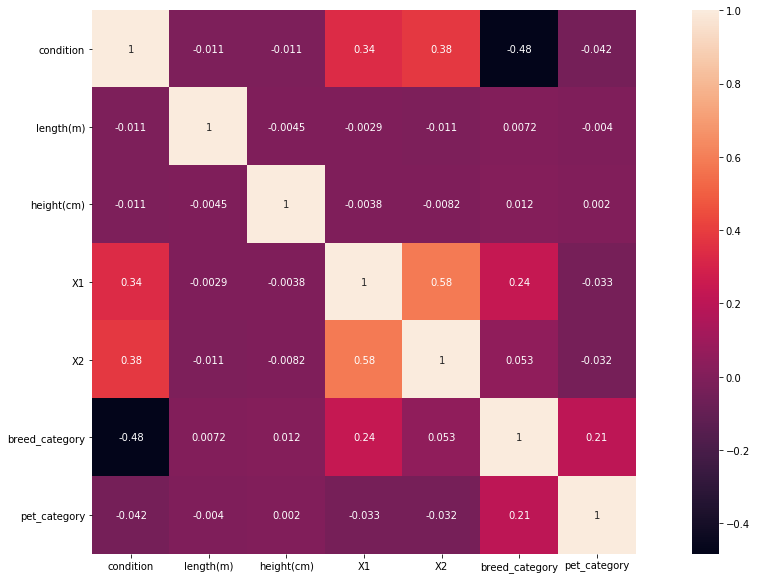

In [76]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df.corr(),square=True,annot = True)

# From the preliminary analysis

It can be seen that the condition,X1 and pet category are strongly correlated to the breed category 
Whereas the only variable having a significant impact on the pet_category is the breed category. Hence we eill try to create a new feature using the issue date and lsiting date.

In [77]:
# Finding the difference between the listing and issue date

df["issue_date"] = df.issue_date.apply(lambda x : x.split()[0])
df["hours"] = df.listing_date.apply(lambda x : int(x.split()[1].split(':')[0]))
df["listing_date"] = df.listing_date.apply(lambda x : x.split()[0])
df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,hours
0,ANSL_69903,2016-07-10,2016-09-21,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,16
1,ANSL_66892,2013-11-21,2018-12-27,1.0,White,0.72,14.19,13,9,0.0,2,17
2,ANSL_69750,2014-09-28,2016-10-19,NaN,Brown,0.15,40.90,15,4,2.0,4,8
3,ANSL_71623,2016-12-31,2019-01-25,1.0,White,0.62,17.82,0,1,0.0,2,18
4,ANSL_57969,2017-09-28,2017-11-19,2.0,Black,0.50,11.06,18,4,0.0,1,9


In [78]:
from datetime import date

df['issue_date'] = df.issue_date.apply(lambda x : date(int(x.split('-')[0]),int(x.split('-')[1]),int(x.split('-')[2])))
df['listing_date'] = df.listing_date.apply(lambda x : date(int(x.split('-')[0]),int(x.split('-')[1]),int(x.split('-')[2])))
df['days'] = (df['listing_date'] - df['issue_date']).apply(lambda x : x.days)
df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,hours,days
0,ANSL_69903,2016-07-10,2016-09-21,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,16,73
1,ANSL_66892,2013-11-21,2018-12-27,1.0,White,0.72,14.19,13,9,0.0,2,17,1862
2,ANSL_69750,2014-09-28,2016-10-19,NaN,Brown,0.15,40.90,15,4,2.0,4,8,752
3,ANSL_71623,2016-12-31,2019-01-25,1.0,White,0.62,17.82,0,1,0.0,2,18,755
4,ANSL_57969,2017-09-28,2017-11-19,2.0,Black,0.50,11.06,18,4,0.0,1,9,52


In [79]:
df.dtypes

pet_id             object
issue_date         object
listing_date       object
condition         float64
color_type         object
length(m)         float64
height(cm)        float64
X1                  int64
X2                  int64
breed_category    float64
pet_category        int64
hours               int64
days                int64
dtype: object

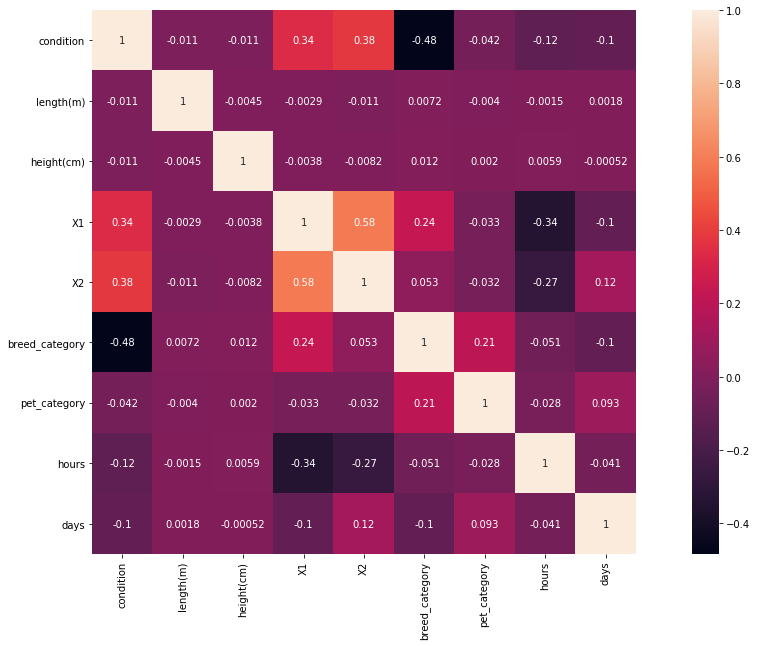

In [80]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df.corr(),square=True,annot = True)

After creating extra features of hours and days from the issue_date and listing_date columns we can see that days and hours are strongly correlated to the target variables.

In [81]:
from sklearn.preprocessing import LabelEncoder
#Label Encoder to convert the color (categorical variables) to numeric trainable values

le = LabelEncoder()
df['color_type'] = le.fit_transform(df['color_type'])

In [82]:
df.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
hours                0
days                 0
dtype: int64

In [83]:
df['condition'] = df['condition'].fillna(1)

In [84]:
#Splitting to for train and test sets 

X = df.iloc[:,3:9]
X['days'] = df['days']
X['hours'] = df['hours']
Y = df.iloc[:,9:11]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

X.dtypes

condition     float64
color_type      int32
length(m)     float64
height(cm)    float64
X1              int64
X2              int64
days            int64
hours           int64
dtype: object

# Decision Tress Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [87]:
y_pred = classifier.predict(x_test)

y_pred_0 = list()
y_pred_1 = list()
for i in y_pred:
    y_pred_0.append(i[0])
    y_pred_1.append(i[1])

In [89]:
from sklearn.metrics import f1_score
s1 = f1_score(y_test["breed_category"],y_pred_0,average='weighted')
s2 = f1_score(y_test["pet_category"],y_pred_1,average='weighted')
score = 100*(s1+s2)/2
score

85.24825408489228

# XGB Classifier

In [93]:
import xgboost as xgb

D_train = xgb.DMatrix(x_train, label=y_train)
D_test = xgb.DMatrix(x_test, label=y_test)

ValueError: DataFrame for label cannot have multiple columns

In [90]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(x_train,y_train)

ValueError: bad input shape (15067, 2)